# AGNs recién nacidos
Este código simula la respuesta de la NLR *(la variación de su intensidad en función del tiempo)*, ante la activación de su agujero negro central. 

Se utiliza un modelo geométrico que **asume**:
* Disco de acreción pequeño comparado con la NRL.
* NLR circular.

Su ejecución depende de *parámetros del sistema* y del *parámetro del algoritmo*.

##### Parámetros del sistema
* $r$ - Radio de la NLR.
* $r_{0}$ - Distancia entre el observador y la NLR.
* $N$ - Número de fotones emitidos por impulso unitario *(por función delta)*.
* $op$ - Tipo de emisión de los fotones, o isotrópica o aleatoria.
* $Deltas$ - Forma de la activación del agujero negro *(entrada)*.

##### Parámetro del algoritmo
* $num$ - Resolución con la que se muestrea el intervalo de tiempo de la respuesta.

### Descripción de la simulación

Del modelo geométrico se obtiene que el tiempo de llegada del primer fotón es: 

## $t_{0}=\frac{r + r_{0}}{c}$
 
El desfase de tiempo entre la llegada de un fotón emitido a $\theta=180^o$ *(primer fotón que llega)* y un fotón emitido a $\theta$ está dado por: 

## $\tau = \frac{r}{c} (1+\cos \theta)$

Ante la entrada de un impulso unitario, es decir, la emisión isotrópica o aleatora de los $N$ fotones, la diferencia para el observador entre el tiempo de llegada del primer y último fotón es:

## $\tau_{max}=\frac{2r}{c}$

Para realizar la simulación, el algoritmo divide el intervalo $\tau_{max}$ en $num$ partes iguales:

## $\tau_{n}=\frac{\tau_{max}}{num}$

El tiempo final de cada uno de los intervalos puede expresarse como:

## $\tau_{n}(i)=i\tau_{n}$ 

con $i=1,2,...,num$

Si la emisión es isotrópica, el ángulo entre fotones adyacentes es de:

## $\theta_{step}=\frac{360}{N}$

Para calcular la respuesta de la NLR el algoritmo determina cuantos fotones llegan en cada uno de los $\tau_{n}(i)$ intervalos de tiempo evaluando la función $\tau$ de la siguiente manera: 

## $Boolean(\theta, i) =
\left\{
    \begin{array}{lll}
        1  & \mbox{if } \tau_{n}(i-1) \leq \tau(\theta) < \tau_{n}(i)  \\
        0 & \mbox{if } \tau(\theta) < \tau_{n}(i-1) \\
        0 & \mbox{if } \tau(\theta) > \tau_{n}(i)
    \end{array}
\right.$


Es decir, el algoritmo itera cada uno de los $N$ fotones emitidos *(iterando $\theta$)* para determinar en qué intervalo de tiempo $\tau_{n}(i)$ debe ser incluido cada uno *(iterando $i$)*. Con esto se obtiene la respuesta de la NLR para una entrada impulso unitario.

 Posteriormente se realiza una convolución para determinar la respuesta a una entrada mas compleja.

La entrada de interés se programa a través del vector $Deltas$.

$Deltas=[1]$ es equivalente a una entrada impulso unitario, es decir, la emisión de $N$ fotones al mismo tiempo.

$Deltas=[2]$ como entrada, es equivalente la emisión de $2N$ fotones al mismo tiempo.

$Deltas=[1, 2]$ como entrada, es equivalente la emisión de $N$ fotones, seguido de una segunda emisión de $2N$ fotones.

$Deltas=[1, 3, 2]$ como entrada, es equivalente la emisión de $N$ fotones, seguido de una segunda emisión de $3N$ fotones, seguido de una tercera emisión de $2N$ fotones.

### Para simular: 
#### Modificar en las celdas respectivas los parámetros del sistema y el parámetro del algoritmo a su gusto, y correrlo con 'Run All'!

#### Parámetros del sistema:

In [1]:
#MODIFICAR ---------------------------------------------
r=300 #Radio de la NLR [km]
r0=1500 #Distancia entre el observador y la NLR [km]
N=70000 #Número de rayos/fotones lanzados por Delta 
op=1 #op=1 para rayos/fotones isotrópicos,op=0 para aleatorios
Deltas=[1, 5, 6, 7, 6, 5, 3, 2, 2, 1, 1, 1] #Entrada
#-------------------------------------------------------

#### Parámetro del algoritmo:

In [2]:
#MODIFICAR ---------------------------------------------
num=50 #Resolución muestreado Tiempo
#-------------------------------------------------------

#### Código:

In [3]:
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import signal

In [4]:
c=300 #Velocidad de la luz [km/s]
Teta=360/N #Paso ángulo
tn=(2*r/c)/num #Paso tiempo

In [5]:
x1 = np.zeros(num) #Guardará la respuesta unitaria
x = np.zeros((np.size(Deltas),num+np.size(Deltas)-1)) #Guardará la respuesta de interés
#print('x1 =',x1)
#print('x =',x)

In [6]:
for k2 in range(N): #Iteración Número Fotones

    j=k2+1

    if op==1: #Emisión isotrópica
        tetag=Teta*(j)
    elif op==0: #Emisión aleatoria
        rd=random.randrange(1,N+1,1)
        tetag=Teta*(rd)

    tetar=math.radians(tetag)

    for k1 in range(num): #Iteración Intervalo Tiempo

        i=k1+1
        Tau=r/c*(1+math.cos(tetar)) #Desfase del fotón

        #Construcción de la respuesta unitaria
        if Tau >= (tn*(i-1)) and Tau < (tn*i):
            x1[k1] = x1[k1] + 1 

        if Tau < (tn*(i-1)) or Tau > (tn*i):
            x1[k1] = x1[k1] + 0
    #print('x1 =',x1)

#np.sum(x1)
#print(" ")
#print('x1 =',x1)

In [7]:
for k3 in range(np.size(Deltas)):#Iteración Número Deltas (Convolución)
    
    #Construcción respuesta de interés        
    x[k3,k3:num+k3]=Deltas[k3]*x1
    #x[k3]=np.roll(x[k3], k3)

#print('x =',x)

In [8]:
xs=np.sum(x,axis=0) #Respuesta de interés
#print('xs =',xs)

## Entrada y Respuesta unitaria:

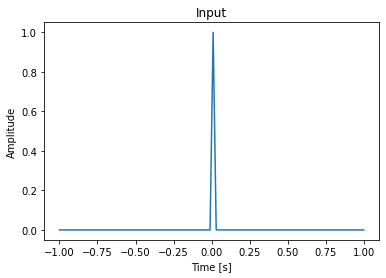

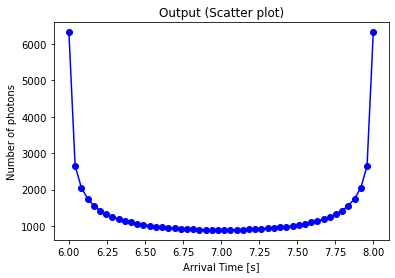

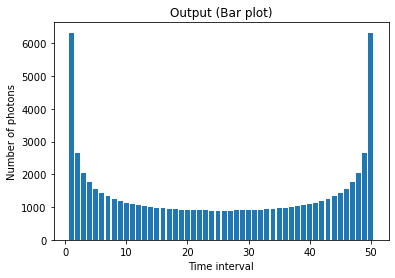

In [9]:
impb = signal.unit_impulse(100, 'mid')
plt.figure()
plt.plot(np.linspace(-1,1,100), impb)
plt.xlabel("Time [s]") 
plt.ylabel("Amplitude") 
plt.title("Input") 

plt.figure() 
axisxb = np.linspace((r0+r)/c,(r0+r)/c+(2*r/c),num) 
#plt.subplot(121)
plt.plot(axisxb,x1,"ob-")
#plt.xlim([0,r0/c+(2*r/c)])
plt.xlabel("Arrival Time [s]") 
plt.ylabel("Number of photons") 
plt.title("Output (Scatter plot)") 

plt.figure()
#plt.subplot(122)
axisxb2 = np.linspace(1,num,num) 
plt.bar(axisxb2,x1)
plt.xlabel("Time interval") 
plt.ylabel("Number of photons") 
plt.title("Output (Bar plot)") 
plt.show()

## Entrada y Respuesta de interés:

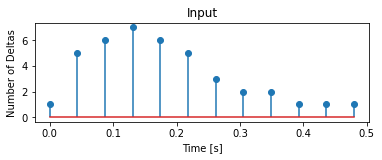

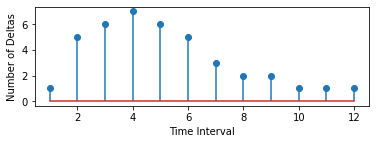

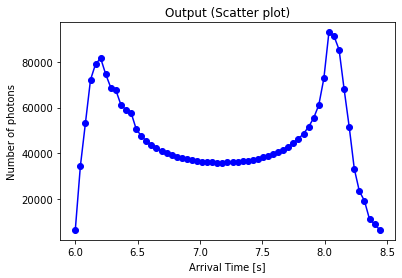

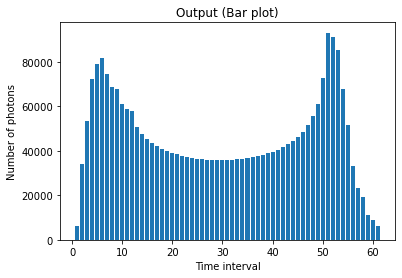

In [10]:
plt.figure() 
plt.subplot(211)
xDeltas = np.linspace(0, np.size(Deltas)*tn, np.size(Deltas)) 
plt.stem(xDeltas, Deltas, use_line_collection = True) 
plt.xlabel("Time [s]") 
plt.ylabel("Number of Deltas") 
plt.title("Input") 
plt.show() 

plt.subplot(212)
plt.stem(np.linspace(1, np.size(Deltas), np.size(Deltas)) , Deltas, use_line_collection = True) 
plt.xlabel("Time Interval") 
plt.ylabel("Number of Deltas") 
plt.show() 

plt.figure() 
axisx = np.linspace((r0+r)/c,(r0+r)/c+(2*r/c)+tn*(np.size(Deltas)-1),num+np.size(Deltas)-1) 
#plt.subplot(121)
plt.plot(axisx,xs,"ob-")
#plt.xlim([r0/c,r0/c+(2*r/c)+tn*(np.size(Deltas)-1)])
plt.xlabel("Arrival Time [s]") 
plt.ylabel("Number of photons") 
plt.title("Output (Scatter plot)") 

plt.figure() 
#plt.subplot(122)
axisx2 = np.linspace(1,num+np.size(Deltas)-1,num+np.size(Deltas)-1) 
plt.bar(axisx2,xs)
plt.xlabel("Time interval") 
plt.ylabel("Number of photons") 
plt.title("Output (Bar plot)") 
plt.show()

In [11]:
#np.insert(x,0,[0, 0, 0])#Agregar al inicio
#np.append(x,[0, 0, 0])#Agregar al final

In [12]:
#%load_ext watermark

# python, ipython, packages, and machine characteristics
#%watermark -v -m -p numpy,matplotlib.pyplot,scipy,watermark 

# date
#print (" ")
#%watermark -u -n -t -z